<div style="text-align: center; font-size: 25pt"> Homework 4 </div>

# Load packages

In [1]:
# packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
import scipy.stats as stats
# you may add more if you need

# Data Relationships

<font color='red'>**Question:**</font>  Load the ``insurance.csv`` dataset.

In [2]:
# load the insurance data
insurance = pd.read_csv("./insurance.csv")

print (insurance.shape)
insurance.head()

(1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Do younger people smoker less?

<font color='red'>**Question:**</font>  Create a new dummy variable called ``younger`` which split the observations into 2 groups based on age. 1 for people with age <=25; 0 for others.



In [3]:
younger = (insurance["age"] <= 25).map({True:1,False:0})
younger

0       1
1       1
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      1
11      0
12      1
13      0
14      0
15      1
16      0
17      1
18      0
19      0
20      0
21      0
22      1
23      0
24      0
25      0
26      0
27      0
28      1
29      0
       ..
1308    1
1309    0
1310    0
1311    0
1312    0
1313    1
1314    0
1315    1
1316    1
1317    1
1318    0
1319    0
1320    0
1321    0
1322    0
1323    0
1324    0
1325    0
1326    0
1327    0
1328    1
1329    0
1330    0
1331    1
1332    0
1333    0
1334    1
1335    1
1336    1
1337    0
Name: age, Length: 1338, dtype: int64

<font color='red'>**Question:**</font> For female and male person respectively, what's the percentage of smokers for younger and older persons?
i.e., make a dataframe like this:

| sex | younger | %smoker |
|:---:|:-------:|:-------:|
|  F  | 1       |         |
|  F  | 0       |         |
|  M  | 1       |         |
|  M  | 0       |         |

In [4]:
g = pd.concat([insurance,pd.DataFrame({"younger":younger})],axis = 1).groupby(["sex","younger"])

def st_smoker(x):
    return "{s}%".format(s = round(100 * x.value_counts()["yes"] / len(x),2))
    
a = g.aggregate({"smoker":st_smoker})
a.columns = a.columns.str.replace("smoker","%smoker")
a = a.reset_index()
a["sex"] = a["sex"].str.replace("female","F")
a["sex"] = a["sex"].str.replace("male","M")
a

,sex,younger,%smoker
0,F,0,16.89%
1,F,1,19.05%
2,M,0,23.6%
3,M,1,23.27%


## For younger people, the health charges of smokers and non-smokers differ or not?

<font color='red'>**Question:**</font> Just for younger persons, make two boxplots in one plot to show the charges for smokers and non-smokers. 

Text(0.5,1,'Charge Distribution of Smokers/Non-Smokers')

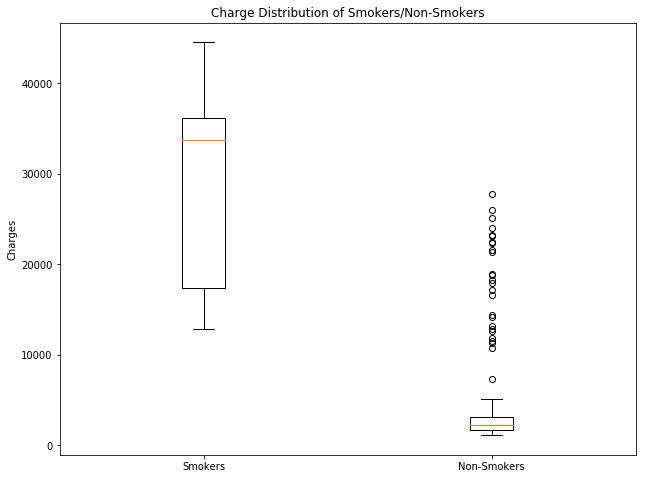

In [5]:
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_axes([0,0,1,1])
ax1.boxplot([insurance.loc[(younger == 1) & (insurance.smoker == "yes")]["charges"],
            insurance.loc[(younger == 1) & (insurance.smoker == "no")]["charges"]])
ax1.set_ylabel("Charges")
ax1.set_xticklabels(["Smokers","Non-Smokers"])
ax1.set_title("Charge Distribution of Smokers/Non-Smokers")

## age v.s. charges for non-smokers

<font color='red'>**Question:**</font> For non-smokers, make a scatterplot to show the correlation between ``age`` and ``charges``, add a linear line to represent the relationship (hint: using ``stats.linregress``)

Text(0.5,1,'Scatter plot')

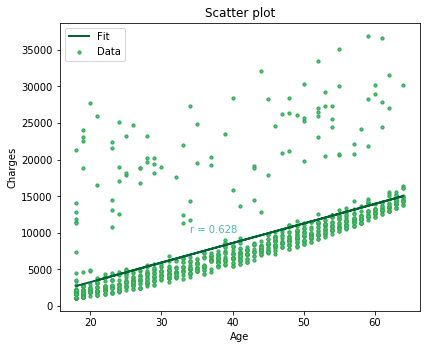

In [6]:
fig = plt.figure(figsize=(5, 4))
axes = fig.add_axes([0, 0, 1, 1])

x = insurance.loc[insurance.smoker == "no"]["age"]
y = insurance.loc[insurance.smoker == "no"]["charges"]
slope, intercept, r_value, _, _ = stats.linregress(x, y)
line = slope * x + intercept

axes.scatter(x, y, label='Data', edgecolors="#34AA43", color = "#45BEAA",s = 10)
axes.plot(x, line, linewidth = 2, color = "#016633", label='Fit')
axes.text(34, 10000, "r = " + str(round(r_value, 3)), color = "#45BEAA")
axes.legend(loc='upper left')
axes.set_xlabel('Age')
axes.set_ylabel('Charges')
axes.set_title('Scatter plot')

<font color='red'>**Question:**</font> For smokers, make a scatterplot to show the correlation between ``age`` and ``charges``, add a linear line to represent the relationship (hint: using ``stats.linregress``)

Text(0.5,1,'Scatter plot')

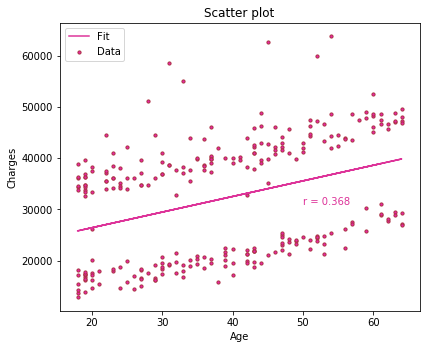

In [7]:
fig = plt.figure(figsize=(5, 4))
axes = fig.add_axes([0, 0, 1, 1])

x = insurance.loc[insurance.smoker == "yes"]["age"]
y = insurance.loc[insurance.smoker == "yes"]["charges"]
slope, intercept, r_value, _, _ = stats.linregress(x, y)
line = slope * x + intercept
axes.plot(x, line, linewidth=1.5, label='Fit',color = "#DD3399")
axes.scatter(x, y, label='Data', edgecolors="#AA3443", color = "#EB23AA",s = 10)
axes.text(50, 31000, "r = " + str(round(r_value, 3)), color = "#DD3399")
axes.legend(loc='upper left')
axes.set_xlabel('Age')
axes.set_ylabel('Charges')
axes.set_title('Scatter plot')

<font color='red'>**Question:**</font> Using different colors for smokers and non-smokers, make scatterplots to show the correlation between ``age`` and ``charges``, add linear lines to represent the relationship respectively.

Text(0.5,1,'Scatter plot')

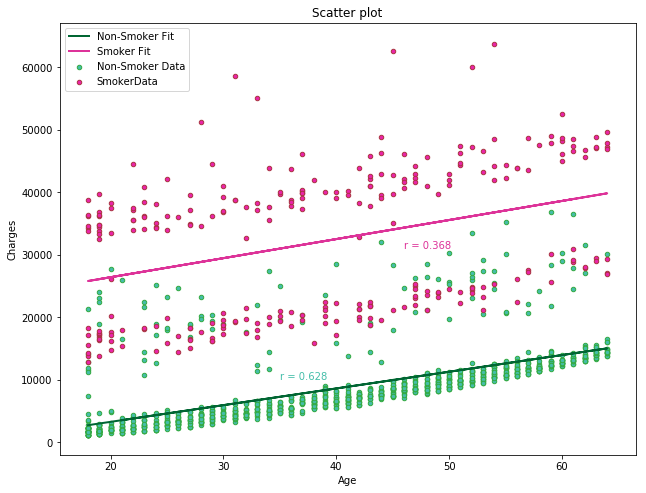

In [8]:
fig = plt.figure(figsize=(8, 6))
axes = fig.add_axes([0, 0, 1, 1])
x1 = insurance.loc[insurance.smoker == "no"]["age"]
y1 = insurance.loc[insurance.smoker == "no"]["charges"]
x2 = insurance.loc[insurance.smoker == "yes"]["age"]
y2 = insurance.loc[insurance.smoker == "yes"]["charges"]
slope1, intercept1, r_value1, _, _ = stats.linregress(x1, y1)
line1 = slope1 * x1 + intercept1
slope2, intercept2, r_value2, _, _ = stats.linregress(x2, y2)
line2 = slope2 * x2 + intercept2
axes.scatter(x1, y1, label='Non-Smoker Data', edgecolors="#34AA43", color = "#45BEAA",s = 20)
axes.plot(x1, line1, linewidth = 2, color = "#016633", label = "Non-Smoker Fit")
axes.scatter(x2, y2, label='SmokerData', edgecolors="#AA3443", color = "#EB23AA",s = 20)
axes.plot(x2, line2, linewidth = 2, label = "Smoker Fit",color = "#DD3399")
axes.text(35, 10000, "r = " + str(round(r_value1, 3)), color = "#45BEAA")
axes.text(46, 31000, "r = " + str(round(r_value2, 3)), color = "#DD3399")
axes.legend(loc='upper left')
axes.set_xlabel('Age')
axes.set_ylabel('Charges')
axes.set_title('Scatter plot')

<font color='red'>**Question:**</font> What you can conclude from the above analysis?

In [9]:
#Smokers have a tendency to expense far more money than non-smokers.
#The charge increases as the age increases.
#The smokers' charges are more fluctuated.

---

# pandas groupby and merge

<font color='red'>**Question:**</font> Load the ``state_population.csv``, ``state_areas.csv`` and the ``state_abbrevs.csv`` in the following three cells.

In [10]:
# load the state_population here
state_population = pd.read_csv("state_population.csv")

state_population.head()

,state/region,ages,year,population
0,AL,under18,2012,1117489.0
1,AL,total,2012,4817528.0
2,AL,under18,2010,1130966.0
3,AL,total,2010,4785570.0
4,AL,under18,2011,1125763.0


In [11]:
# load the state_areas here
state_areas = pd.read_csv("state_areas.csv")

state_areas.head()

,state,area (sq. mi)
0,Alabama,52423
1,Alaska,656425
2,Arizona,114006
3,Arkansas,53182
4,California,163707


In [12]:
# load the state_abbrevs here
state_abbrev = pd.read_csv("state_abbrevs.csv")

state_abbrev.head()

,state,abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


<font color='red'>**Question:**</font> Rank US ***states with full name*** by their 2010 population density. 

Note: 
1. Here the population density is the total population devided by area.
1. You need to take care of missing values when merging data. In case of missing values, just drop them.
1. The total population is the population with ``ages`` equals to ``total``.

In [13]:
df1 = pd.merge(state_abbrev,state_areas,left_on = "state",right_on = "state")
df1 = pd.merge(df1,state_population,left_on = "abbreviation",right_on = "state/region")
df1["population_density"] = df1["population"] / df1["area (sq. mi)"]
df2 = df1.loc[(df1.ages == "total") & (state_population.year == 2010)][["state","population_density"]]
df2.columns = df2.columns.str.replace("population_density","2010_population_density")
df2 = df2.sort_values(by = "2010_population_density",ascending = False)
df2.reset_index(drop = True)

,state,2010_population_density
0,District of Columbia,8898.897059
1,New Jersey,1009.253268
2,Rhode Island,681.339159
3,Connecticut,645.600649
4,Massachusetts,621.815538
5,Maryland,466.445797
6,Delaware,460.445752
7,New York,356.094135
8,Florida,286.597129
9,Pennsylvania,275.966651


<font color='red'>**Question:**</font> Based on the above merged table, calculate the average and standard deviations of population density for each states.

In [28]:
df3 = df1.loc[df1.ages == "total"]
df3.columns = df3.columns.str.replace("population_density","population_density_total")
df4 = df1.loc[df1.ages == "under18"]
df4.columns = df4.columns.str.replace("population_density","population_density_under18")
df5 = pd.merge(df3.groupby("state").aggregate({"population_density_total":[np.mean,np.std]}),
         df4.groupby("state").aggregate({"population_density_under18":[np.mean,np.std]}),
        left_on = "state",right_on = "state")
df5

population_density_total              \
                                         mean         std   
state                                                       
Alabama                             85.545045    4.486721   
Alaska                               0.984431    0.077983   
Arizona                             46.441414    8.385203   
Arkansas                            50.640774    3.535277   
California                         209.729195   15.818095   
Colorado                            41.876976    5.717944   
Connecticut                        620.653454   19.639446   
Delaware                           410.937777   41.135916   
District of Columbia              8633.371936  326.750704   
Florida                            250.867464   31.573966   
Georgia                            140.920964   18.821500   
Hawaii                             114.886930    7.601503   
Idaho                               15.995962    2.261960   
Illinois                           213.591570    7.520677   
Indiana                            168.100295    8.537198   
Iowa                                52.205844    1.577351   
Kansas                              32.837619    1.487910   
Kentucky                           100.871657    5.421288   
Louisiana                           85.661046    2.179238   
Maine                               36.366939    1.071710   
Maryland                           434.173551   27.844340   
Massachusetts                      600.473899   19.232888   
Michigan                           101.504344    2.227849   
Minnesota                           56.966751    3.650695   
Mississippi                         58.425931    2.658533   
Missouri                            80.900599    4.182787   
Montana                              6.229075    0.420720   
Nebraska                            22.322478    1.078849   
Nevada                              18.964557    4.773182   
New Hampshire                      132.460971    8.361290   
New Jersey                         965.454149   41.076515   
New Mexico                          15.205630    1.416905   
New York                           347.421846    8.449770   
North Carolina                     153.856481   18.851882   
North Dakota                         9.249240    0.307584   
Ohio                               253.019954    4.520812   
Oklahoma                            49.924540    2.961290   
Oregon                              35.189296    3.281423   
Pennsylvania                       268.565664    5.493992   
Rhode Island                       674.655852   14.028931   
South Carolina                     128.769307   12.440464   
South Dakota                         9.925185    0.525973   
Tennessee                          136.682968   11.777783   
Texas                               80.439992   10.818130   
Utah                                27.337324    4.198260   
Vermont                             63.048596    2.130267   
Virginia                           169.475551   14.824785   
Washington                          84.184271    8.580093   
West Virginia                       75.251790    0.788185   
Wisconsin                           82.409353    3.905823   
Wyoming                              5.217118    0.388820   

                     population_density_under18              
                                           mean         std  
state                                                        
Alabama                               21.196746    0.428319  
Alaska                                 0.284378    0.004783  
Arizona                               12.109489    1.921445  
Arkansas                              12.788206    0.503227  
California                            55.489504    2.386844  
Colorado                              10.530384    1.108403  
Connecticut                          147.182825    4.986739  
Delaware                              98.704090    6.433301  
District of Columbia                1650.549

# The end